# Прогнозирование оттока клиентов Банка


## Описание проекта


Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
**Цель исследования:** 
На основе данных из банка определить клиент, который может уйти.

**Результаты исследования:** Построить модель со значением метрики качества F1 не меньше 0.59.


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

***Описание данных***






•	RowNumber — индекс строки в данных

•	CustomerId — уникальный идентификатор клиента

•	Surname — фамилия

•	CreditScore — кредитный рейтинг

•	Geography — страна проживания

•	Gender — пол

•	Age — возраст

•	Tenure — сколько лет человек является клиентом банка

•	Balance — баланс на счёте

•	NumOfProducts — количество продуктов банка, используемых клиентом

•	HasCrCard — наличие кредитной карты

•	IsActiveMember — активность клиента

•	EstimatedSalary — предполагаемая зарплата

***Целевой признак***

•	Exited — факт ухода клиента

## Подготовка данных

#### Импортируем библиотеки, которые будем использовать в дальнейшем.

In [1]:
import pandas as pd
import numpy as np
from random import randint
from random import choice
from math import isnan
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#### Загружаем данные

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

#### Применяем ранее написанную функцию чтобы ознакомится с данными.

In [3]:
def df_info(df: pd.DataFrame):
    display(df.info())
    display(df.describe().T)
    display(df.sample(10))
    print(f"Количество дубликатов: {df.duplicated().sum()}")
df_info (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6502,6503,15590286,Fairley,611,France,Female,40,2.0,125879.29,1,1,0,93203.43,0
8488,8489,15794360,Hao,592,Germany,Female,70,5.0,71816.74,2,1,0,105096.82,1
6211,6212,15793116,Beneventi,502,Germany,Female,40,7.0,117304.29,1,0,0,196278.32,0
5474,5475,15696277,Hs?,651,France,Female,34,9.0,0.00,2,1,0,138113.71,0
3113,3114,15779529,Grant,620,France,Male,32,7.0,0.00,2,1,1,34665.79,0
3065,3066,15614827,Sun,503,France,Male,42,8.0,104430.08,1,1,1,147557.71,0
2604,2605,15643752,Wei,540,France,Male,25,5.0,116160.23,1,1,0,13411.67,0
5678,5679,15732265,Obialo,630,France,Male,33,9.0,0.00,2,1,0,64804.59,0
3316,3317,15758116,Rossi,666,France,Male,53,5.0,64646.70,1,1,0,128019.48,1
9160,9161,15753679,Mullawirraburka,778,France,Male,24,4.0,0.00,2,1,1,162809.20,0


Количество дубликатов: 0


#### Вывод:
В столбце Tenure есть значения NaN. Исправим эту ситуацию.


### Заполняем значения NaN.

#### Смотрим как распределены значения.

In [4]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

#### Принимаем решение заполнить значения NaN случайными данными из списка существующих значений.

In [5]:
med = df['Tenure'].median()
def Replacing_median (temp):
    if isnan(temp):return med
    else: return temp
    
df['Tenure'] = df['Tenure'].apply(Replacing_median)

#### Проверяем результат

In [6]:
df['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

### Убираем не нужные в обучении модели столбцы (индекс строки в данных, уникальный идентификатор клиента, фамилия) 

In [7]:
df = df.drop(['Surname','RowNumber','CustomerId'], axis=1)

### Выполняем унитарное кодирование (One Hot Encoding)

In [8]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

### Смотрим что получилось 

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


### Вывод
Данные подготовлены. Можно приступать к обучению модели.
Во время подготовки данных мы избавились от NaN значений, убрали не нужные в обучении модели столбцы и выполнили унитарное кодирование (One Hot Encoding).



## Исследование задачи

### Разделим данные на обучающие, валидационные и тестовые.

In [12]:
df_temp, df_test = train_test_split(df, test_size=0.2, random_state=12345)
df_train, df_valid = train_test_split(df_temp, test_size=0.25, random_state=12345)

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

#### Проверяем размерность.

In [13]:
print ('features_train имеет размерность:', features_train.shape)
print ('target_train имеет размерность:', target_train.shape)
print ('features_valid имеет размерность:', features_valid.shape)
print ('target_valid имеет размерность:', target_valid.shape)
print ('features_test имеет размерность:', features_test.shape)
print ('target_test имеет размерность:', target_test.shape)

features_train имеет размерность: (6000, 11)
target_train имеет размерность: (6000,)
features_valid имеет размерность: (2000, 11)
target_valid имеет размерность: (2000,)
features_test имеет размерность: (2000, 11)
target_test имеет размерность: (2000,)


#### Вывод:
Выборки успешно разделены.


### Масштабируем признаки 

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()


scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#### Смотрим что получилось 

In [15]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,0.816929,1,1,0.801922,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8819,-0.618839,-0.268942,1.801078,0.744283,-0.896909,0,1,0.803658,1,0,1
1537,1.743227,-1.032439,1.077681,-1.232442,-0.896909,1,1,-1.098797,0,0,0
1408,0.567351,-0.650691,1.439380,-1.232442,0.816929,0,0,-1.202257,0,0,1
7661,-0.412545,0.494555,-1.092511,0.615524,-0.896909,1,1,-0.038931,1,0,1


####  Вывод:
Данные готовы. Переходим к обучению модели.

### Модель «Дерево решений»

Сравниваем эффективность данной модели на различной глубине.

In [16]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc = pd.DataFrame({'name': ['Модель «Дерево решений»'], 'f1': [f1_temp], 'roc_auc': [auc_roc]})


Лучшее значение F1-меры получено с параметром max_depth = 7 , и составляет 0.5583596214511041
Значение auc_roc = 0.49171543806417123


#### Вывод:
Результат неплохой, но не отличный.
Посмотрим на остальные модели.

### Модель «Логистическая регрессия»

In [17]:
model = LogisticRegression(random_state=12345) 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('Значение F1-меры =', f1_score(target_valid, predictions_valid)) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Логистическая регрессия»', f1_score(target_valid, predictions_valid), auc_roc]

Значение F1-меры = 0.30131826741996237
Значение auc_roc = 0.7703391568208877


#### Вывод:
Результат не лучший, зато метод быстрый.

### Модель «Случайный лес»

Сравниваем эффективность данной модели на различной глубине и с разным количеством деревьев.

#### Выберем лучший параметр max_depth для этой модели

In [18]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)



Лучшее значение F1-меры получено с параметром max_depth = 19 , и составляет 0.5624999999999999
Значение auc_roc = 0.8289783014024373


#### Выберем лучший параметр n_estimators для этой модели

In [19]:
n_e_temp = 0
f1_temp = 0
best_model = None

for n_e in range(1, 50, 1):
    model = RandomForestClassifier(n_estimators=n_e, max_depth=depth_temp, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        n_e_temp = n_e
        best_model = model
print('Лучшее значение F1-меры получено с параметром n_estimators =', n_e_temp,', и составляет', f1_temp)

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Случайный лес»', f1_temp, auc_roc]

Лучшее значение F1-меры получено с параметром n_estimators = 41 , и составляет 0.5804416403785488
Значение auc_roc = 0.8401359679170396


#### Вывод:
Данная модель показала наилучшие результаты.

## Борьба с дисбалансом

### Улучшим качество модели, учитывая дисбаланс классов. 

### Устраняем дисбаланс классов при помощи class_weight

### Модель «Дерево решений»

Сравниваем эффективность данной модели на различной глубине.

In [20]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)


df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Борьба с дисбалансом - class_weight', '', '']

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Дерево решений»', f1_temp, auc_roc]


Лучшее значение F1-меры получено с параметром max_depth = 6 , и составляет 0.5587044534412956
Значение auc_roc = 0.8090671240258203


#### Вывод:
Результат неплохой, но не отличный.
Посмотрим на остальные модели.


### Модель «Логистическая регрессия»

In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('Значение F1-меры =', f1_score(target_valid, predictions_valid)) 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Логистическая регрессия»', f1_score(target_valid, predictions_valid), auc_roc]

Значение F1-меры = 0.4741532976827095
Значение auc_roc = 0.7725660805030526


#### Вывод:
Результат не лучший, зато метод быстрый.

### Модель «Случайный лес»

Сравниваем эффективность данной модели на различной глубине и с разным количеством деревьев.

#### Выберем лучший параметр max_depth для этой модели

In [22]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

Лучшее значение F1-меры получено с параметром max_depth = 8 , и составляет 0.5889281507656067
Значение auc_roc = 0.850324024548615


#### Выберем лучший параметр n_estimators для этой модели

In [23]:
n_e_temp = 0
f1_temp = 0
best_model_1 = None

for n_e in range(1, 50, 1):
    model = RandomForestClassifier(n_estimators=n_e, max_depth=depth_temp, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        n_e_temp = n_e
        best_model_1 = model
print('Лучшее значение F1-меры получено с параметром n_estimators =', n_e_temp,', и составляет', f1_temp)
probabilities_valid = best_model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Случайный лес»', f1_temp, auc_roc]

Лучшее значение F1-меры получено с параметром n_estimators = 26 , и составляет 0.5951557093425606
Значение auc_roc = 0.8512793287120561


### Борьба с дисбалансом - Увеличение выборки

In [24]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Дисбаланс классов составляет примерно 4:1. Исправим ситуацию увеличив недостающий класс.

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Дисбаланс классов устранен, переходим к обучению.

### Модель «Дерево решений»

Сравниваем эффективность данной модели на различной глубине.

In [26]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)


df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Борьба с дисбалансом - Увеличение выборки', '', '']

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Дерево решений»', f1_temp, auc_roc]


Лучшее значение F1-меры получено с параметром max_depth = 6 , и составляет 0.5587044534412956
Значение auc_roc = 0.809054407830633


#### Вывод:
Результат неплохой, но не отличный.
Посмотрим на остальные модели.


### Модель «Логистическая регрессия»

In [27]:
model = LogisticRegression(random_state=12345) 
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
print('Значение F1-меры =', f1_score(target_valid, predictions_valid)) 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Логистическая регрессия»', f1_score(target_valid, predictions_valid), auc_roc]

Значение F1-меры = 0.4771126760563381
Значение auc_roc = 0.7725676700274511


#### Вывод:
Результат не лучший, зато метод быстрый.

### Модель «Случайный лес»

Сравниваем эффективность данной модели на различной глубине и с разным количеством деревьев.

#### Выберем лучший параметр max_depth для этой модели

In [28]:
depth_temp = 0
f1_temp = 0
best_model = None

for depth in range(1, 30, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        depth_temp = depth
        best_model = model
print('Лучшее значение F1-меры получено с параметром max_depth =', depth_temp,', и составляет', f1_temp)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

Лучшее значение F1-меры получено с параметром max_depth = 13 , и составляет 0.5892420537897312
Значение auc_roc = 0.8421570481896112


#### Выберем лучший параметр n_estimators для этой модели

In [29]:
n_e_temp = 0
f1_temp = 0
best_model = None

for n_e in range(1, 50, 1):
    model = RandomForestClassifier(n_estimators=n_e, max_depth=depth_temp, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > f1_temp:
        f1_temp = result
        n_e_temp = n_e
        best_model = model
print('Лучшее значение F1-меры получено с параметром n_estimators =', n_e_temp,', и составляет', f1_temp)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

df_f1_roc_auc.loc[len(df_f1_roc_auc.index)] = ['Модель «Случайный лес»', f1_temp, auc_roc]

Лучшее значение F1-меры получено с параметром n_estimators = 37 , и составляет 0.5949367088607594
Значение auc_roc = 0.8481439918362027


#### Вывод:
Данная модель показала наилучшие результаты. Проверку на тестовой выборке будем осуществлять именно на этой модели.


### Сравнительная таблица показателей f1 и roc_auc при разных условиях.

In [30]:
df_f1_roc_auc

,name,f1,roc_auc
0,Модель «Дерево решений»,0.55836,0.491715
1,Модель «Логистическая регрессия»,0.301318,0.770339
2,Модель «Случайный лес»,0.580442,0.840136
3,Борьба с дисбалансом - class_weight,,
4,Модель «Дерево решений»,0.558704,0.809067
5,Модель «Логистическая регрессия»,0.474153,0.772566
6,Модель «Случайный лес»,0.595156,0.851279
7,Борьба с дисбалансом - Увеличение выборки,,
8,Модель «Дерево решений»,0.558704,0.809054
9,Модель «Логистическая регрессия»,0.477113,0.772568


### Вывод
Наиболее эффективным оказалась Модель «Случайный лес».
Борьба с дисбалансом - class_weight	и «Увеличение выборки» показали примерно равную эффективность.



## Тестирование модели

### Проверим лучшую модель на тестовой выборке

In [31]:
model = best_model_1
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print('Значение F1-меры =', result)

Значение F1-меры = 0.6342451874366767


#### Вывод:
Значение F1-меры на тестовой выборке больше 0.59. То есть наша модель удовлетворяет заданным критериям.


### Построим ROC-кривую

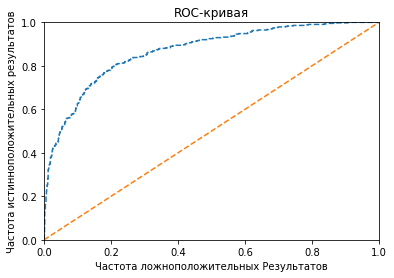

In [32]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Частота ложноположительных Результатов')
plt.ylabel('Частота истинноположительных результатов')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')


plt.show()

#### Вывод:
ROC-кривая показывает, что модель выбрана корректно.


### Находим значение auc_roc

In [33]:
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print('Значение auc_roc =', auc_roc)

Значение auc_roc = 0.8671886980381764


#### Вывод:
Значение auc_roc так же говорит о том, что модель выбрана корректно.


## Общий вывод

На тестовой выборке удалость достичь значения F1-меры = 0.61, что больше заданного для выполнения этого задания значения в 0.59.
